<a href="https://colab.research.google.com/github/sanyog87/PythonWriteUps/blob/main/Regex_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content

1. **Business Case-1 Intro** 


2. **Regular Expressions**
    - Simple pattern matching 
    - `.` character
    - `\` character


3.  **Metacharacters**
    - Matching digits (and non digits) - `\d`, `\D`
    - Matching word (and non-word) characters - `\w`, `\W`
    - Matching Whitespace characters - `\s`, `\S`

4.  **Anchors**
    - Word boundary (and non-boundary) anchors - `\b`, `\B`
    - Beginning and end anchors - `^`,`$`$
    - **Parse phone numbers from the text**


5.  **Character Set** 
    - Range notation - `[a-z]`, `[A-Z]`, `[1-6]`
    - Negation - `[^a-z]`


6. **Quantifiers**
    - *, +, ?, {3}, {3, 4}
    - **Parse names starting from Mr**
    

7.  **Groups**
    - `()` and `|`


8. **RegEx based Email Validation**


9.  **Functions in `re` library**
    - Search function- match, search, findall, finditer
    
    - Use `re` functions to find the patterns in the data 
      - **Extract phone numbers, emails and names**
      
    - `re.compile()`
    
    - Modifying Regular Expression with **flags** - re.IGNORECASE, re.VERBOSE
    
    - Extracting different parts of the email - `group(x)` method
    
    - **Business Case-1 Solution** - Parse and Mask email and phone numbers using re functions
    
    - Extract location and pincode


  



### Use Case-1: Extract customer information and mask email and phone number



In [ ]:
!gdown 1sSDV5UspYZL3UUOGuiuxppSGcv1wS9ex

Downloading...
From: https://drive.google.com/uc?id=1sSDV5UspYZL3UUOGuiuxppSGcv1wS9ex
To: /content/data.txt
100% 9.33k/9.33k [00:00<00:00, 10.0MB/s]


In [ ]:
data = open("data.txt", "r").read()
print(data[:500]) # display some data

Dave Martin
615-555-7164
173 Main St., Springfield RI 55924
davemartin@bogusemail.com

Charles Harris
800-555-5669
969 High St., Atlantis VA 34075
charlesharris@bogusemail.com

Eric Williams
560-555-5153
806 1st St., Faketown AK 86847
laurawilliams@bogusemail.com

Corey Jefferson
900-555-9340
826 Elm St., Epicburg NE 10671
coreyjefferson@bogusemail.com

Jennifer Martin-White
714-555-7405
212 Cedar St., Sunnydale CT 74983
jenniferwhite@bogusemail.com

Erick Davis
800-555-6771
519 Washington St., 


#### Solution-1: Using String formatting

In [ ]:
def mask_email(s):
  if "@" in s:
    name, domain = s.split("@")
    return f"{name[0]}####{name[-1]}@{domain}"

In [ ]:
mask_email("abcd@efgh.com")

'a####d@efgh.com'

#### What would be returned if email string doesn't contain @?

In [ ]:
mask_email("abcd.com")

####  Other boundary cases?

In [ ]:
mask_email("a@efgh.com") # name is single character

'a####a@efgh.com'

In [ ]:
mask_email("abcd@efgh") # another invalid email add

'a####d@efgh'


#### How can we check if an email address is valid?

- There are a bunch of rules provided by wwwc
- Even if we have those rules, we will have to write a bigg if-elif-else based solution.


#### RegEx solution





In [ ]:
import re # import regex library

def is_vemail(s):
  email_pattern = "^\w+([\.-]?\w+)*@\w+([\.-]?\w+)*(\.\w{2,3})+$"
  res = re.search(email_pattern, s)
  # scans through string looking for the first location where pattern is found - will discuss about re module later
  if res:
    return True
  else:
    return False

In [ ]:
is_vemail("ai.with.anant@gmail.com")

True

In [ ]:
is_vemail("abcd@efgh")

False

In [ ]:
is_vemail("a@efgh.com")

True

In [ ]:
is_vemail("anant.mittal@iiit.ac.in") # multiple dots

True

In [ ]:
is_vemail("anant.mittal@umd.edu") # other domain

True

- The string `^\w+([\.-]?\w+)*@\w+([\.-]?\w+)*(\.\w{2,3})+$` is called a Regular Expression

### So, what is a Regular Expression (RegEx)?




- RegEx can be thought of as a **tiny highly specialised programming language** which can be **used to find the patterns in the strings**


#### How to write thes regular expressions?

- Rules for writing REs are programming language agnostic,


Online tool: https://regexr.com/



Sample text:

```
abcdefghijklmnopqurtuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ
1234567890

abcdef

.[{()\^$|?*+

scaler.com

321-555-4321
123.555.1234

Mr. Varma
Mr Anant
Ms Nandini
Mrs. Singh
Mr. T
```

#### Finding simple patterns in this textual content

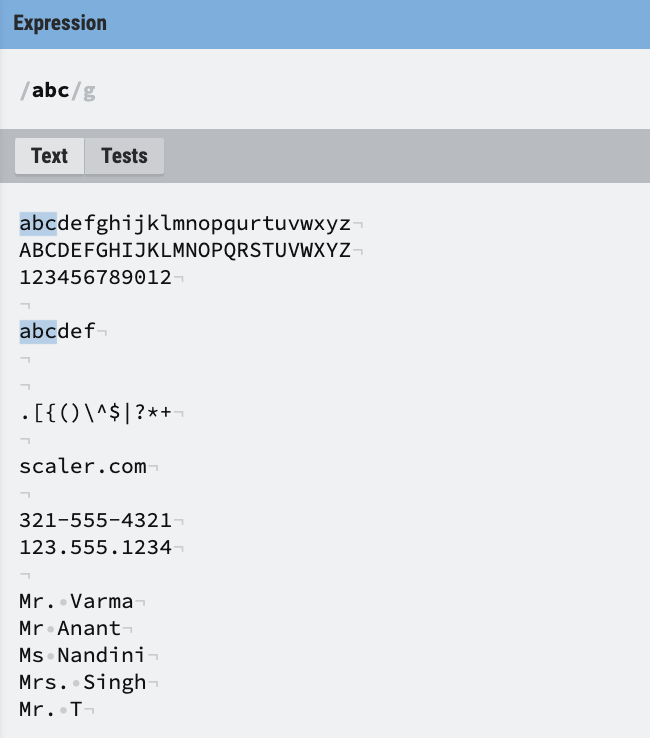

- Notice that, **it couldn't find "ABC"**, that means, **it is case sensitive**.

#### Can it find the same string if we jumble up the chars in RE?

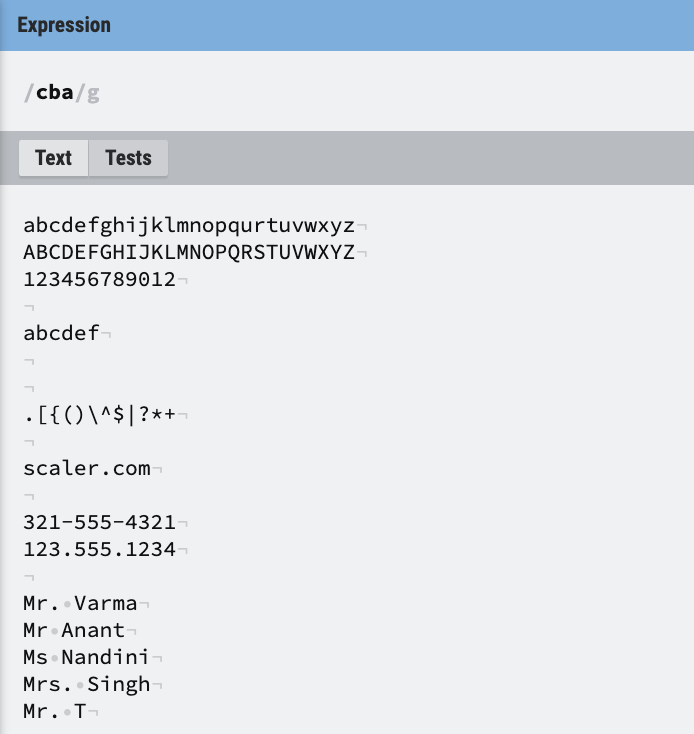

No, it couldn't, which means, **order matters**


#### Finding period symbol (dot) "." 




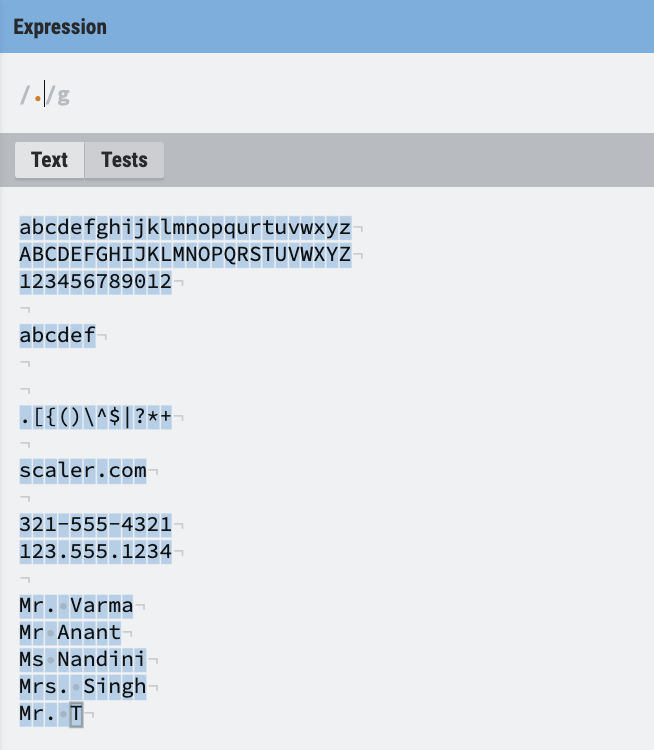

- it highlights EVERYTHING except newline.
- dot has a special meaning in REs

#### use escape character (backslash) along with dot.




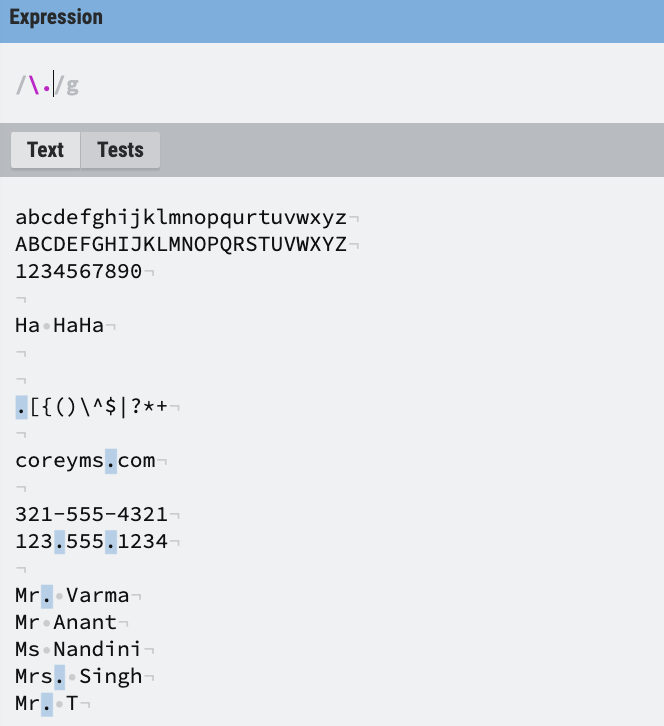

- escapse sequence followed by dot matches with period character.

### What are Metacharacters?

-  **Special characters that don’t match themselves**
- Instead, they signal, some out-of-ordinary thing should be matched.
- Example:  `.[{()\^$|?*+`
- Notice that backslash is also a meta-character, so to look for literal `\`, we need to use `\\`




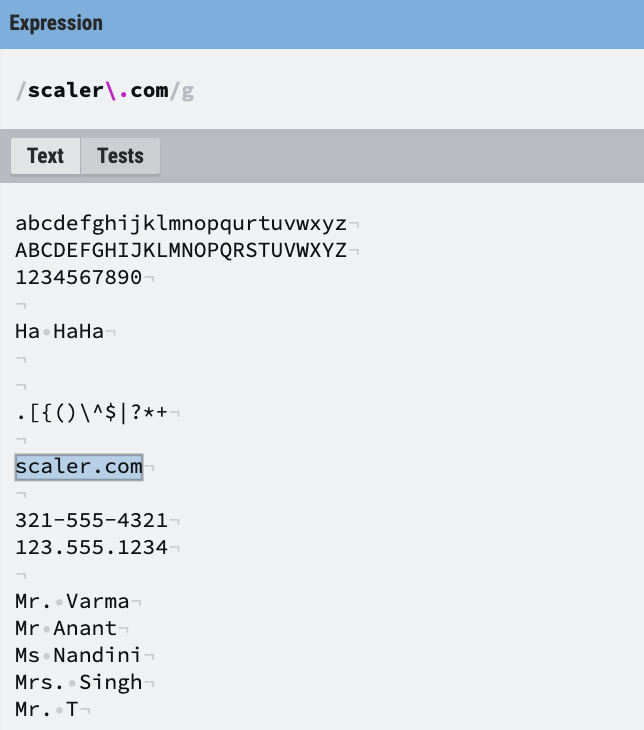


```
.       - Any Character Except New Line
\d      - Digit (0-9)
\D      - Not a Digit (0-9)
\w      - Word Character (a-z, A-Z, 0-9, _)
\W      - Not a Word Character
\s      - Whitespace (space, tab, newline)
\S      - Not Whitespace (space, tab, newline)

\b      - Word Boundary
\B      - Not a Word Boundary
^       - Beginning of a String
$       - End of a String

[]      - Matches Characters in brackets
[^ ]    - Matches Characters NOT in brackets
|       - Either Or
( )     - Group
```


Documentation: https://docs.python.org/3/howto/regex.html



#### Metacharacter - `\d`
- matches with all the digits




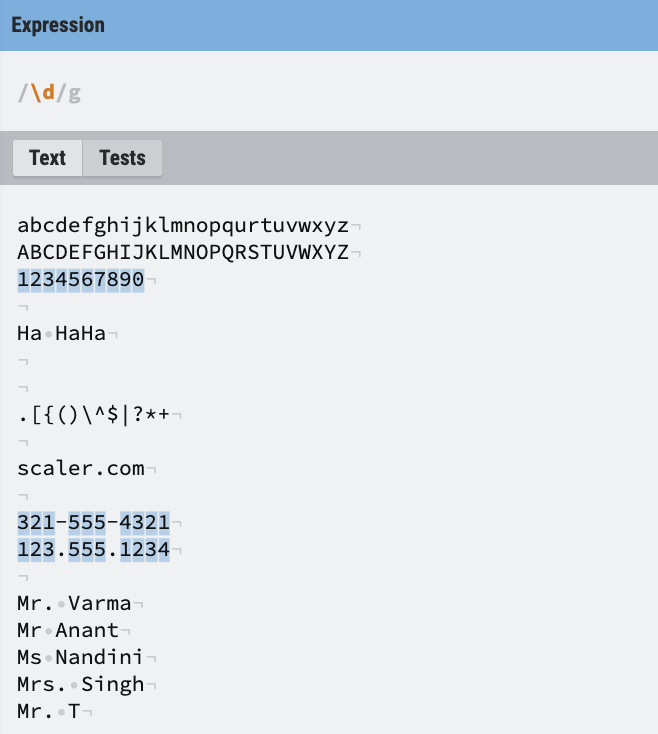



#### Metachar: `\D`

- matches for everything which is not a digit except newline

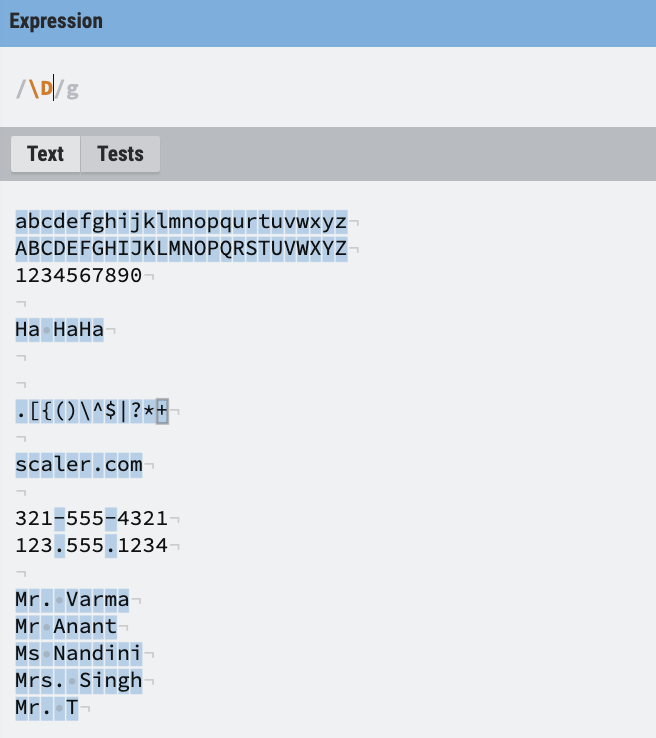



#### Metachar -  `\w`

- **looks for alphanumeric characters and underscore** (_)

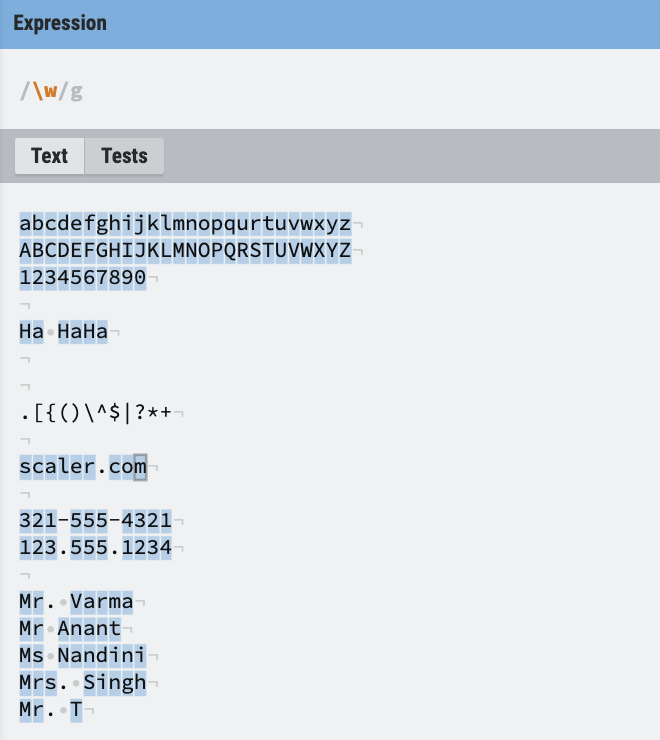




#### Metacharacter `\W`?
- matches with non-alphanumeric characters


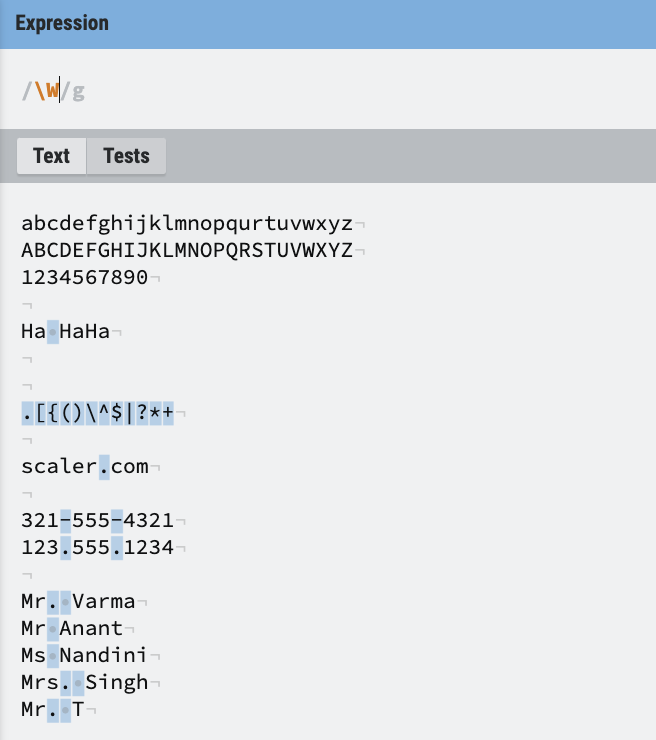

- **upper-case counterparts negates the search**
- Notice that none of these meta-characeters matches for newline character.


#### Matching Whitespace characters

- `\s`


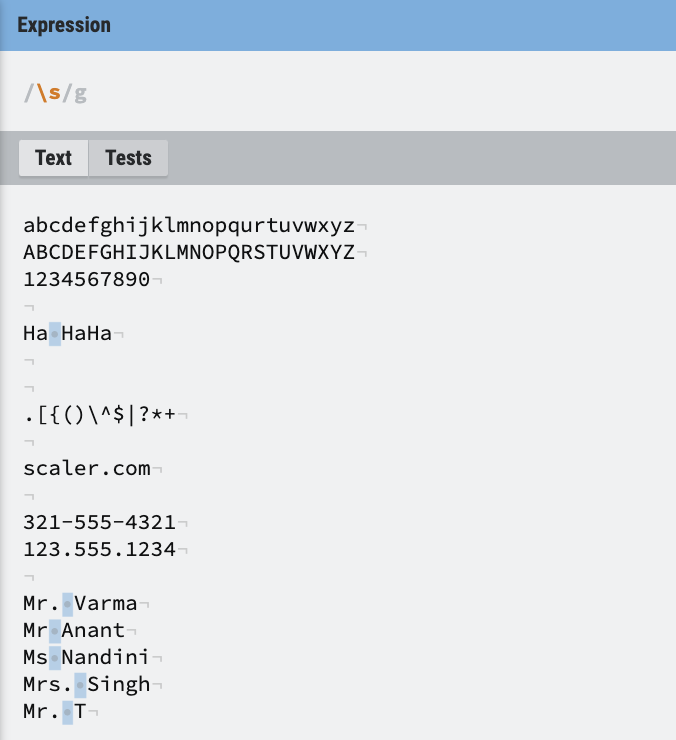

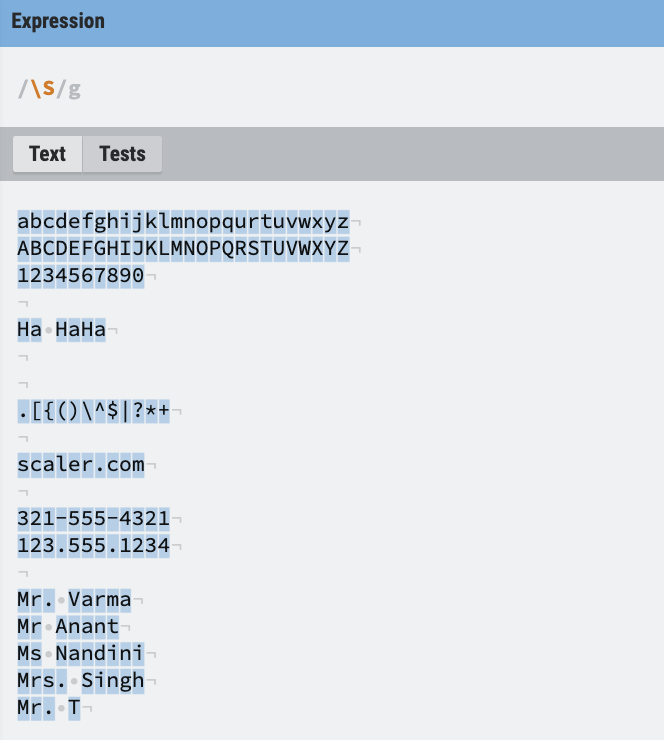

Other special characters:

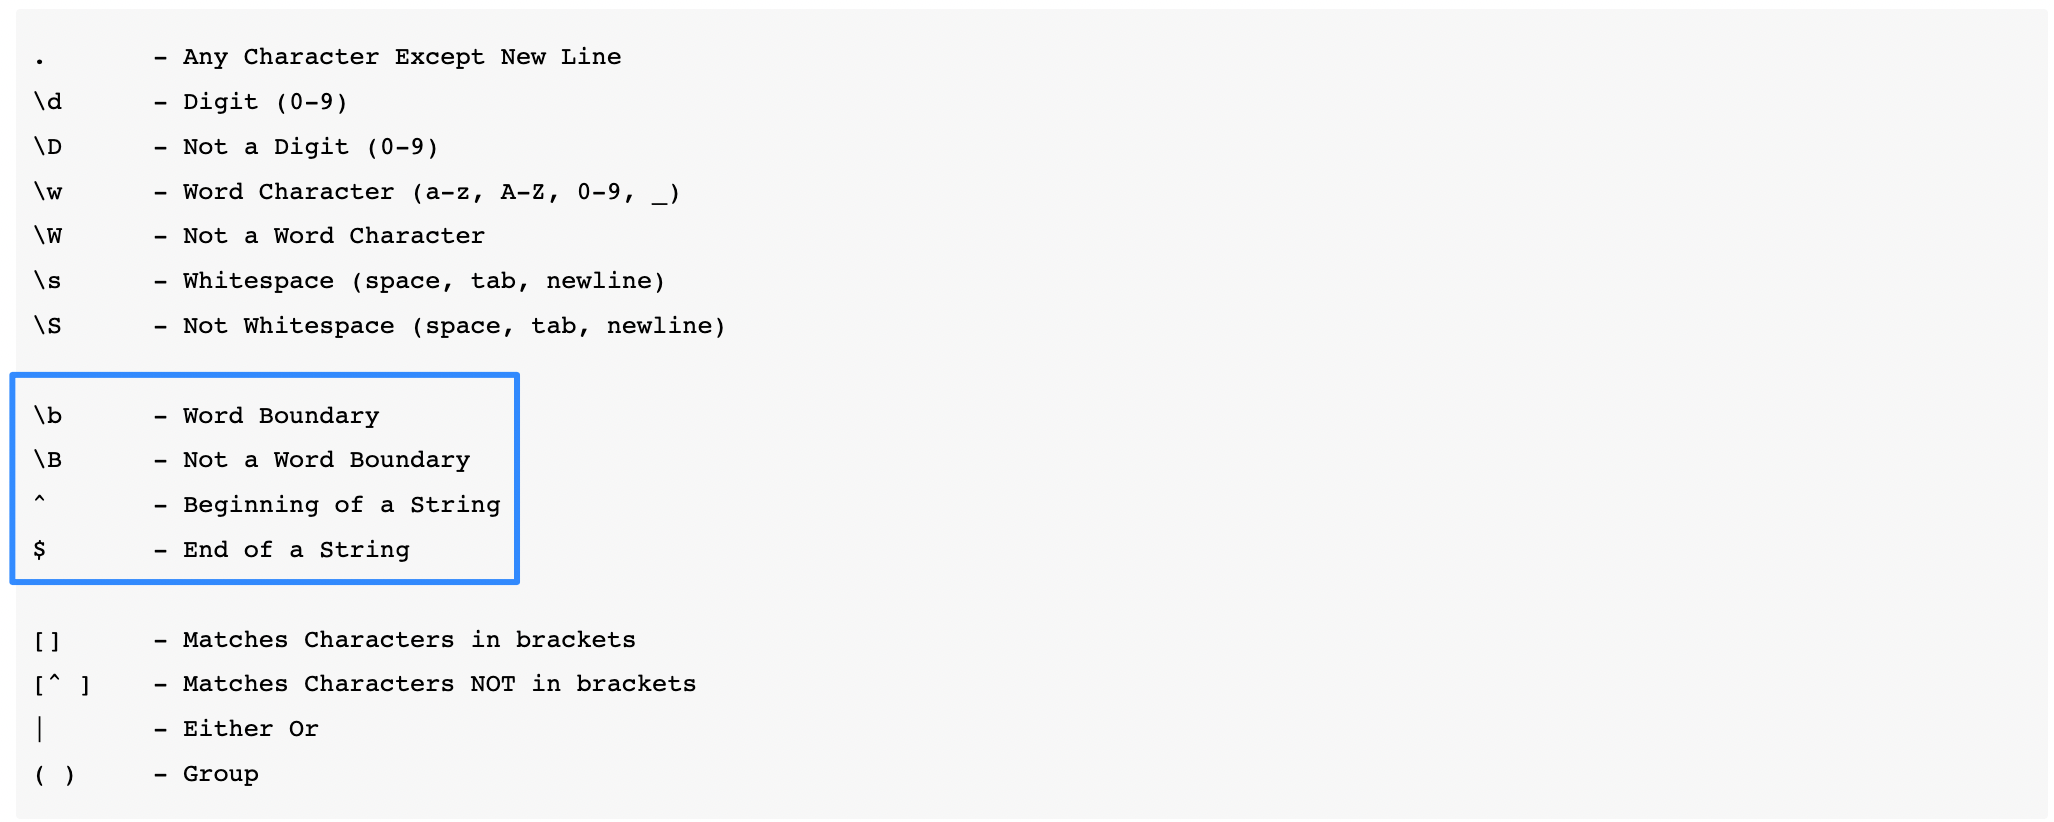


### What are Anchors?


- They don't match any characters
- They match invisible positions before or after the characters


####  `\b`
- word boundary

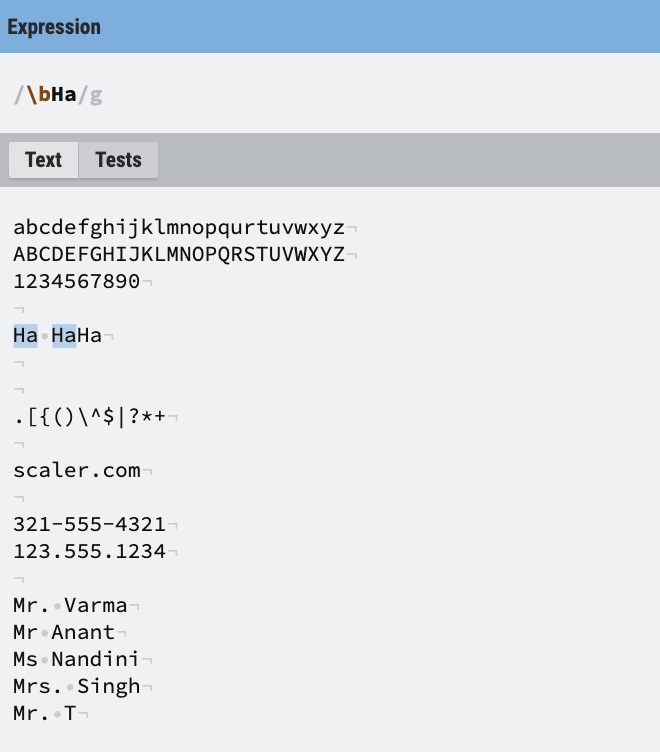

- Notice, if we are checking word boundary with Ha, it only matches with first two Ha
- Both start of the **line and whitespace are considered as word boundaries**

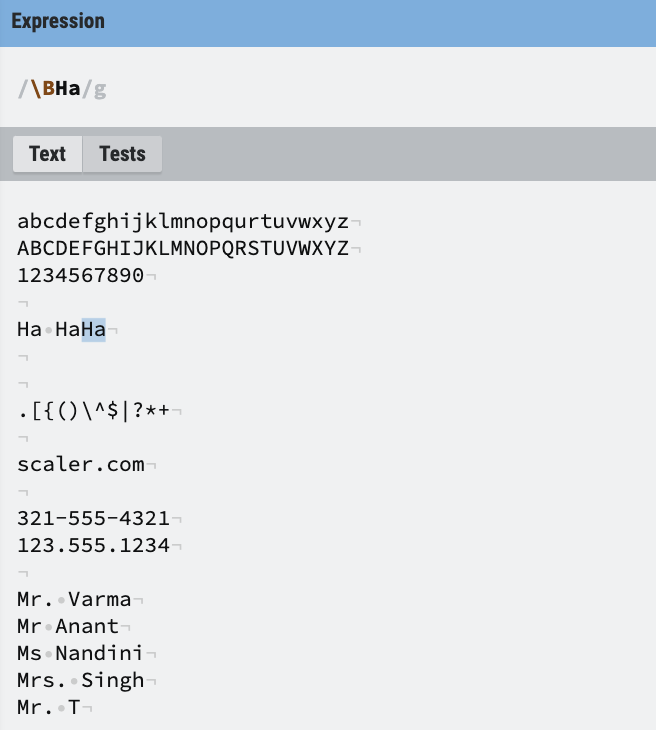

#### Lets see two very important anchors `^` and `$`


`^` matches for a pattern only if its in the begining of the string

`$` matches for a pattern only if its in the end of the string

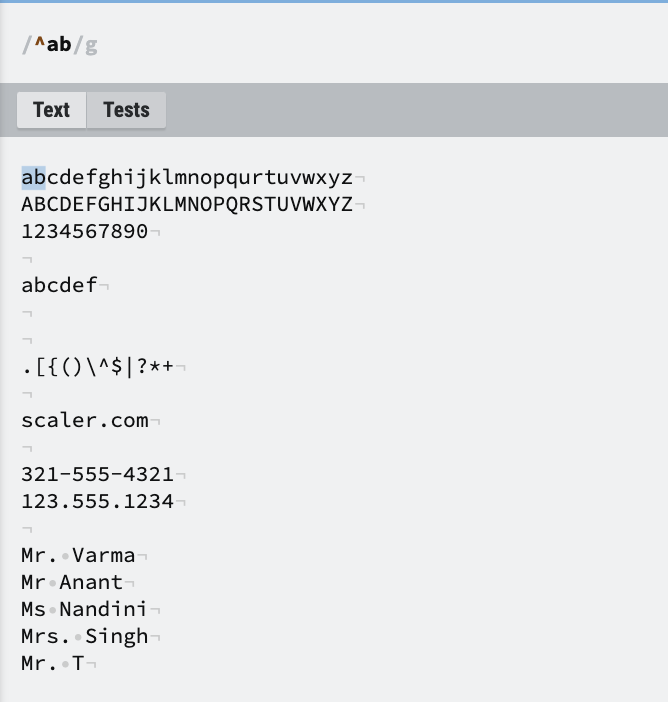


### Parse phone numbers in the given text

Sample text:
```
    abcdefghijklmnopqurtuvwxyz
    ABCDEFGHIJKLMNOPQRSTUVWXYZ
    1234567890

    Ha HaHa

    .[{()\^$|?*+

    scaler.com

    321-555-4321
    123.555.1234

    Mr. Varma
    Mr Anant
    Ms Nandini
    Mrs. Singh
    Mr. T
```

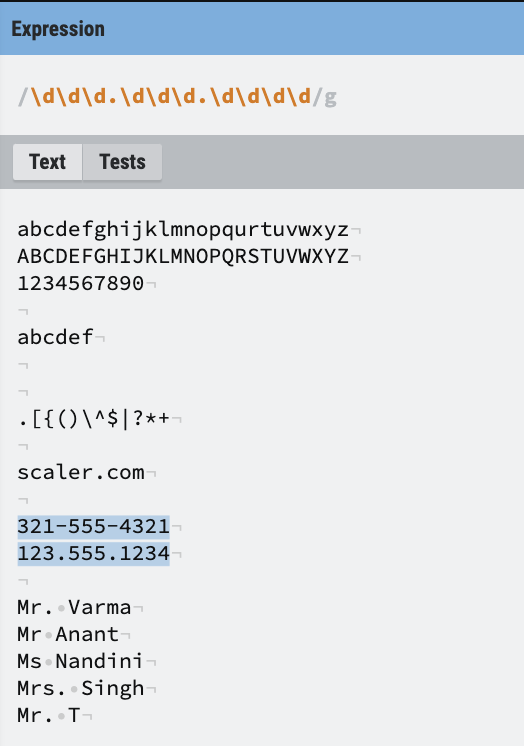

Replace "1234567890" with "123456789012" in text

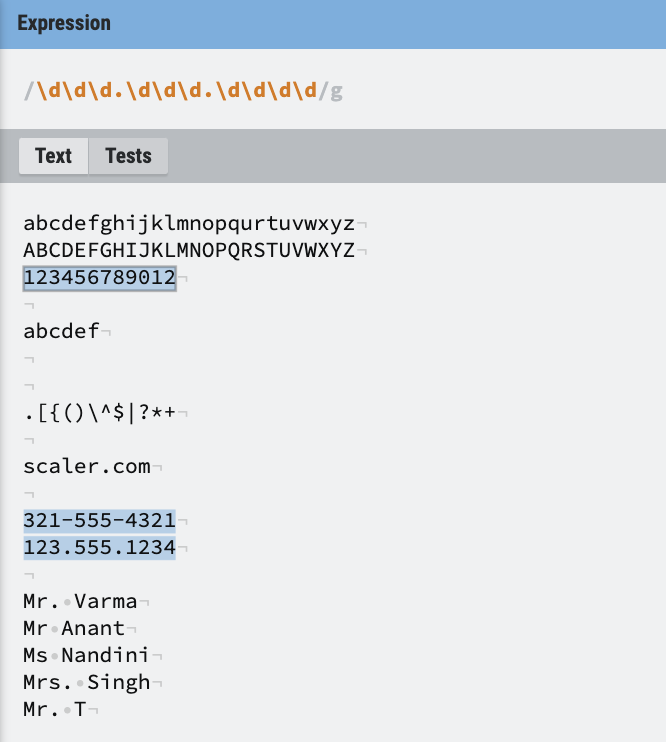

we need to be more specific about only allowing dot or dash.


### Character Set

Character Set matches for one of the possible characters defined in the set.

For example  `[.-]`






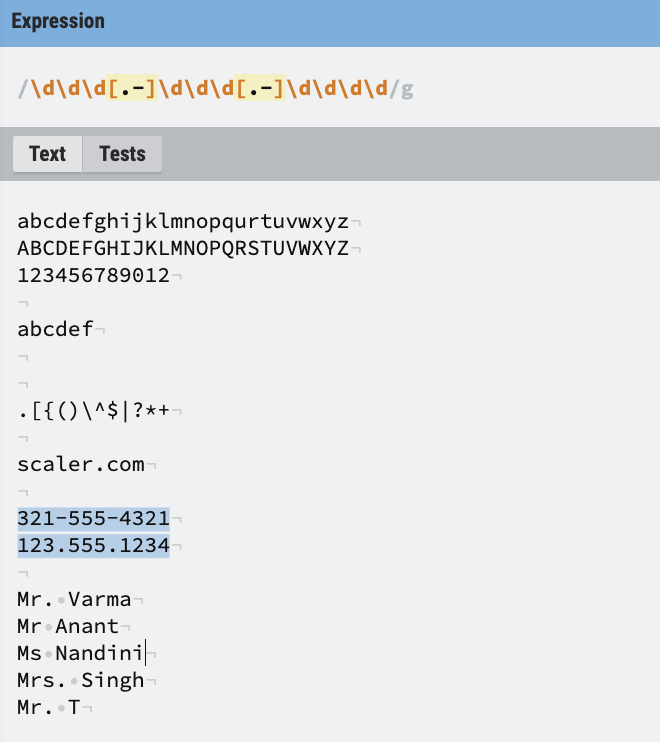




Note: Instead of listing all potential characters that you want to match, you can also provide the range


1. `[1-6]` - Looks for digit between 1 and 6
2. `[a-z]` - Looks for any alphabet between a and z


#### What if want to match the chars/numbers except the ones mentioned in the set?

- use the `^` to negate the set like  `[^a-z]` to match everything which is not a lowercase character

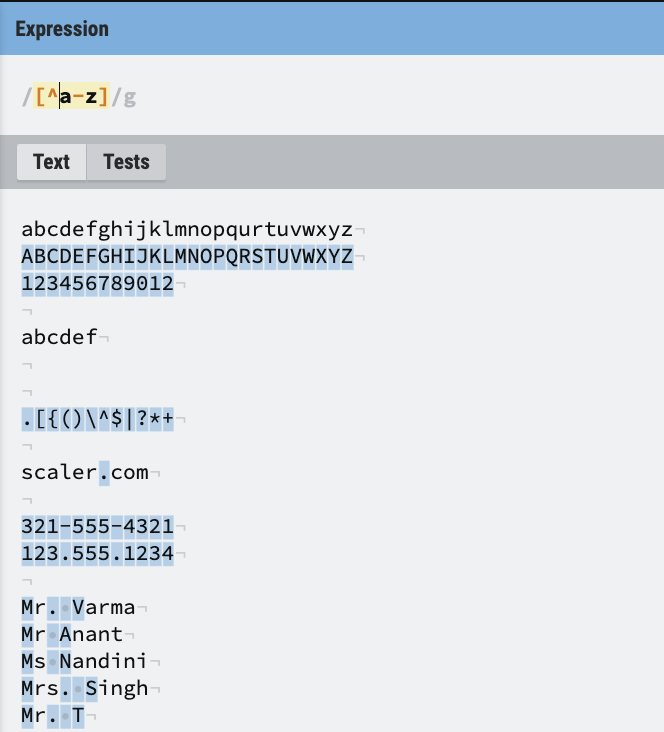

### Quantifiers


- match more than one characters at a time using quantifiers


Available quantifiers:

```
*       - 0 or More
+       - 1 or More
?       - 0 or One
{3}     - Exact Number
{3,4}   - Range of Numbers (Minimum, Maximum)
```


Example:  `\d{3}[.-]\d{3}[-.]\d{4}`



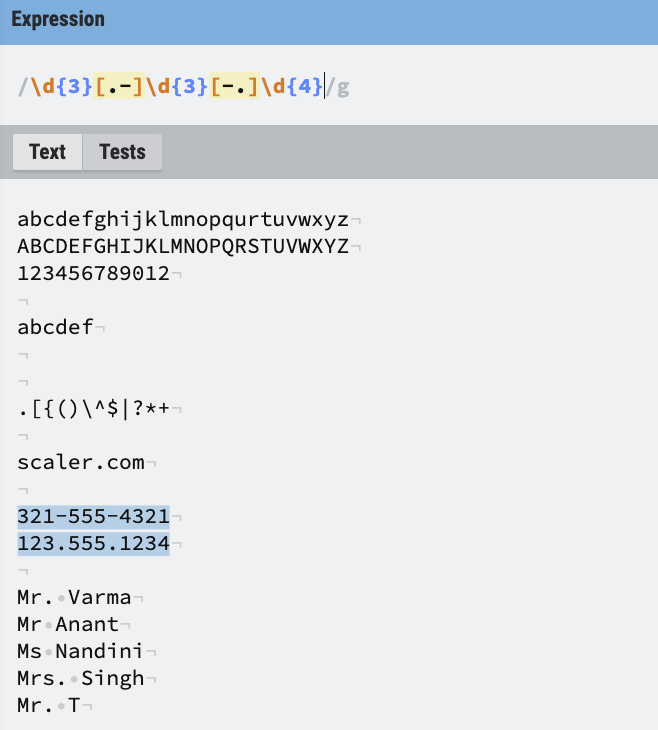

#### Search for names starting with Mr


`\bMr\.?\s[A-Z][a-z]*`


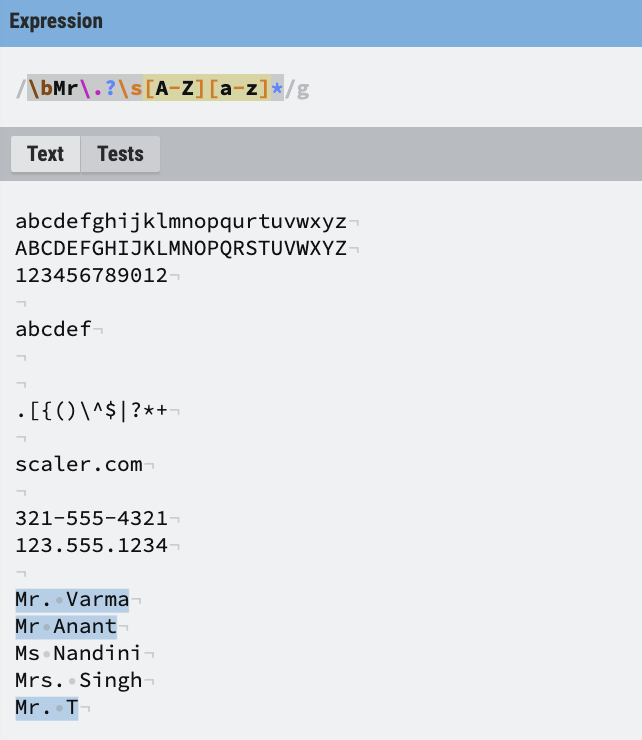

#### adding Ms and Mrs to search pattern 
- using groups



### What are Groups?


- Groups allow us to match several different patterns
- We can create groups using paranthesis ()


`M(r|s|rs)\.?\s[A-Z]\w*`

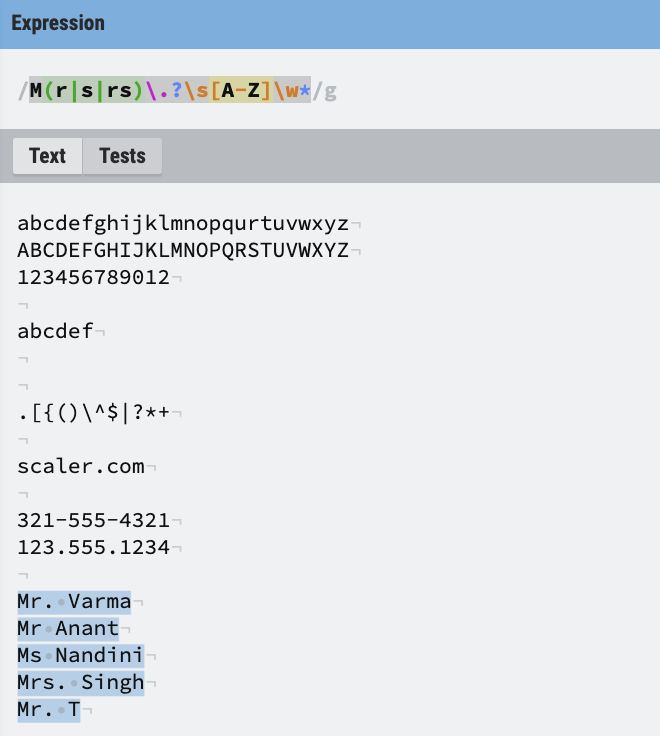



### Email Validation RegEX


`^\w+([\.-]?\w+)*@\w+([\.-]?\w+)*(\.\w{2,3})+$`


1. ^ means start and $ means end, 
2. `\w+` means alphanumeric, one or more times
3. Then the group `([\.-]?\w+)*`
4. Within the group, we have `[\.-]?` which means either dot or dash, zero or one time
6.  `(\.\w{2,3})+` - matches . followed by 2 or 3 letter word i.e. com, in etc




#### Writing Readable regex

In [ ]:
 
regex = '^\w+([\.-]?\w+)*@\w+([\.-]?\w+)*(\.\w{2,3})+$' # highly non-readable regex

#https://docs.python.org/2/library/re.html
regex_verbose = re.compile(r"""           # VERY readable and easy to understand. Software maintanability.
            ^\w+([\.-]?\w+)*              # start, \w+, 
            @                             # single @ sign 
            \w+([\.-]?\w+)*               # Domain name 
            (\.\w{2,3})+$                 # .com, .ac.in,    
             """,re.VERBOSE | re.IGNORECASE)   # no need to worry about these flags for now       

res = regex_verbose.match("abcd@iisc.ac.in"); # no need to worry about the Python functions for now
print(res.string)
print(res)

abcd@iisc.ac.in
<re.Match object; span=(0, 15), match='abcd@iisc.ac.in'>


### Important `re` functions
 
 - `match` : Checks for a match only at the beginning of the string
 - `search` : Locates the pattern in the string
 - `findall` : Find all occurence of the string
 - `finditer`: Return an iterator yielding match objects over all non-overlapping matches


Function to do string manipulation: 

 - `sub` : Search and replace of the string
 - `split` : Split the text by the given regular expression pattern


### Extracting Phone Numbers




In [ ]:
pattern = "\d{3}-\d{3}-\d{4}"
print(re.match(pattern, data))

None


####  **search function**

In [ ]:
pattern = "\d{3}-\d{3}-\d{4}"
print(re.search(pattern, data))

<re.Match object; span=(12, 24), match='615-555-7164'>


- gives the location of the first occurance

Notice, unlike `match()`, it doesn’t restrict us to find matches at the beginning of the string only.

#### finding ALL occurences of the pattern using `findall()`

In [ ]:
pattern = "\d{3}-\d{3}-\d{4}"
phone_numbers = re.findall(pattern, data)
print(phone_numbers)

['615-555-7164', '800-555-5669', '560-555-5153', '900-555-9340', '714-555-7405', '800-555-6771', '783-555-4799', '516-555-4615', '127-555-1867', '608-555-4938', '568-555-6051', '292-555-1875', '900-555-3205', '614-555-1166', '530-555-2676', '470-555-2750', '800-555-6089', '880-555-8319', '777-555-8378', '998-555-7385', '800-555-7100', '903-555-8277', '196-555-5674', '900-555-5118', '905-555-1630', '203-555-3475', '884-555-8444', '904-555-8559', '889-555-7393', '195-555-2405', '321-555-9053', '133-555-1711', '900-555-5428', '760-555-7147', '391-555-6621', '932-555-7724', '609-555-7908', '800-555-8810', '149-555-7657', '130-555-9709', '143-555-9295', '903-555-9878', '574-555-3194', '496-555-7533', '210-555-3757', '900-555-9598', '866-555-9844', '669-555-7159', '152-555-7417', '893-555-9832', '217-555-7123', '786-555-6544', '780-555-2574', '926-555-8735', '895-555-3539', '874-555-3949', '800-555-2420', '936-555-6340', '372-555-9809', '890-555-5618', '670-555-3005', '509-555-5997', '721-55

Another handy function which gives us the match objects -  `finditer()`

In [ ]:
pattern = "\d{3}-\d{3}-\d{4}"
numbers = re.finditer(pattern, data)
for i, num in enumerate(numbers):
  print(num)
  if i == 5: # printing first five
    break

<re.Match object; span=(12, 24), match='615-555-7164'>
<re.Match object; span=(102, 114), match='800-555-5669'>
<re.Match object; span=(191, 203), match='560-555-5153'>
<re.Match object; span=(281, 293), match='900-555-9340'>
<re.Match object; span=(378, 390), match='714-555-7405'>
<re.Match object; span=(467, 479), match='800-555-6771'>


#### How can we extract the location and content from these re.Match objects?

In [ ]:
pattern = "\d{3}-\d{3}-\d{4}"
numbers = re.finditer(pattern, data)
for i, num in enumerate(numbers):
  print(num.group(), num.start(), num.end())
  break


615-555-7164 12 24


The "group" function of a regular expression allows you to pick out parts of the matching text.

### Extract emails

`(string1)@(string2).(2+characters)`

In [ ]:
pattern = r'\w+@\w+\.\w{2,3}'
emails = re.finditer(pattern, data)
for i, email in enumerate(emails):
  print(email)
  if i == 5: # printing first five
    break

<re.Match object; span=(60, 85), match='davemartin@bogusemail.com'>
<re.Match object; span=(147, 175), match='charlesharris@bogusemail.com'>
<re.Match object; span=(235, 263), match='laurawilliams@bogusemail.com'>
<re.Match object; span=(325, 354), match='coreyjefferson@bogusemail.com'>
<re.Match object; span=(425, 453), match='jenniferwhite@bogusemail.com'>
<re.Match object; span=(517, 540), match='tomdavis@bogusemail.com'>


Lets see if our old generic pattern would have worked or not

In [ ]:
pattern = '\w+([\.-]?\w+)*@\w+([\.-]?\w+)*(\.\w{2,3})+'
emails = re.finditer(pattern, data)
for i, email in enumerate(emails):
  print(email)
  if i == 5: # printing first five
    break

<re.Match object; span=(60, 85), match='davemartin@bogusemail.com'>
<re.Match object; span=(147, 175), match='charlesharris@bogusemail.com'>
<re.Match object; span=(235, 263), match='laurawilliams@bogusemail.com'>
<re.Match object; span=(325, 354), match='coreyjefferson@bogusemail.com'>
<re.Match object; span=(425, 453), match='jenniferwhite@bogusemail.com'>
<re.Match object; span=(517, 540), match='tomdavis@bogusemail.com'>


### Extract Names

Name follows the pattern:

`String1 String2`

- First alphabet of string 1 starts with upper case followed by lower case alphabets
- Followed by white space character
- First alphabet of string 2 also starts with upper case follwed by lower case alphabets



In [ ]:
pattern = '[A-Z][a-z]*\s[A-Z][a-z]*'

names = re.finditer(pattern,data)
for i, name in enumerate(names):
  print(name)
  if i == 5:
    break

<re.Match object; span=(0, 11), match='Dave Martin'>
<re.Match object; span=(29, 36), match='Main St'>
<re.Match object; span=(39, 52), match='Springfield R'>
<re.Match object; span=(87, 101), match='Charles Harris'>
<re.Match object; span=(119, 126), match='High St'>
<re.Match object; span=(129, 139), match='Atlantis V'>


### Takeaways?

- Along with names we are also getting some part of addresses as well eg Maple St ,Oak St etc .

#### Why ?

- Because they are also following the pattern string i.e. 1 or more character followed by capital letter

- modify our pattern by adding one more [a-z] or using {2,}

In [ ]:
pattern = '([A-Z][a-z]+\s[A-Z][a-z]{2,})'

names = re.finditer(pattern,data)
for i, name in enumerate(names):
  print(name)
  if i == 5:
    break

<re.Match object; span=(0, 11), match='Dave Martin'>
<re.Match object; span=(87, 101), match='Charles Harris'>
<re.Match object; span=(177, 190), match='Eric Williams'>
<re.Match object; span=(265, 280), match='Corey Jefferson'>
<re.Match object; span=(356, 371), match='Jennifer Martin'>
<re.Match object; span=(455, 466), match='Erick Davis'>


In [ ]:
### sub and split - to be done later


### Modifying Regular Expression with flags

#### `re.I` or `re.IGNORECASE`

Makes matching case insensitive
   

In [ ]:
print(re.search('a+', 'aaaAAA'))
print(re.search('A+', 'aaaAAA'))

<re.Match object; span=(0, 3), match='aaa'>
<re.Match object; span=(3, 6), match='AAA'>


Lets try do the same pattern matching while ignoring case

In [ ]:
print(re.search('a+', 'aaaAAA', re.I))
print(re.search('A+', 'aaaAAA', re.IGNORECASE))

<re.Match object; span=(0, 6), match='aaaAAA'>
<re.Match object; span=(0, 6), match='aaaAAA'>


#### `re.X` or `re.VERBOSE`


The verbose flag allows to add

- Better spacing, indentation, and a clean format for writing intricate patterns.
- Allows us to add comments right inside the pattern for later reference using the hash sign (#).


In [ ]:
regex_verbose = re.compile(r"""           # VERY readable and easy to understand. Software maintanability.
            ^\w+([\.-]?\w+)*              # start, \w+, 
            @                             # single @ sign 
            \w+([\.-]?\w+)*               # Domain name 
            (\.\w{2,3})+$                 # .com, .ac.in,    
             """,re.VERBOSE | re.IGNORECASE)

#### using multiple flags together 

Simply add them together using '|'

In [ ]:
target_str = "Priya is an Instructor at Scaler and her salary is 100000"

result = re.search(r"""(^\w{2,}) # match 2+ word at the start
                        .+(\d{6}$) # match 6-digit number at the end """, 
                   target_str, re.X | re.I)


print(result)
print(result.group())

<re.Match object; span=(0, 57), match='Priya is an Instructor at Scaler and her salary i>
Priya is an Instructor at Scaler and her salary is 100000


#### But why this method which extracts the matched text is called `group()`?

Notice we have defined two groups in the text


1. `(.*)`
2. `(.*?)`

We can extract them seperately by passing index in the `group()`

In [ ]:
result.group(1)

'Priya'

In [ ]:
result.group(2)

'100000'

In [ ]:
result.group(0)

'Priya is an Instructor at Scaler and her salary is 100000'

#### Extracting different parts of the email using the same technique?

In [ ]:
pattern = r'(\w+)@(\w+)\.(\w{2,3})'
emails = re.finditer(pattern, data)
for i, email in enumerate(emails):
  print(email.group(), email.group(1), email.group(2), email.group(3))
  if i == 5: # printing first five
    break

davemartin@bogusemail.com davemartin bogusemail com
charlesharris@bogusemail.com charlesharris bogusemail com
laurawilliams@bogusemail.com laurawilliams bogusemail com
coreyjefferson@bogusemail.com coreyjefferson bogusemail com
jenniferwhite@bogusemail.com jenniferwhite bogusemail com
tomdavis@bogusemail.com tomdavis bogusemail com


#### Extracting pincode from the data 

In [ ]:
print(data[:200])

Dave Martin
615-555-7164
173 Main St., Springfield RI 55924
davemartin@bogusemail.com

Charles Harris
800-555-5669
969 High St., Atlantis VA 34075
charlesharris@bogusemail.com

Eric Williams
560-555-5


Location in the data eg. ` Atlantis VA 34075` follows following pattern
- First letter is upper case followed by some alphabets
- whitepace character
- Two capital letters for codes
- whitespace character
- pincode

In [ ]:
regex = '[A-Z][a-z]+\s[A-Z]+\s\d+'
matches = re.findall(regex,data)
print(matches)

['Springfield RI 55924', 'Atlantis VA 34075', 'Faketown AK 86847', 'Epicburg NE 10671', 'Sunnydale CT 74983', 'Olympus TN 32425', 'Dawnstar IL 61914', 'Pythonville LA 29947', 'Quahog OR 90938', 'Winterfell VA 99000', 'Lakeview NY 87282', 'Smalltown WY 28362', 'Westworld TX 61967', 'Balmora MT 56526', 'Valyria KY 97152', 'Mordor IL 72160', 'Blackwater NH 97183', 'Bedrock IA 58176', 'Mordor TX 89212', 'Smalltown SC 96962', 'Smalltown ND 77737', 'Bedrock GA 34615', 'Balmora OR 30826', 'Quahog MS 29348', 'Valyria KY 94854', 'Olympus NV 21888', 'Lakeview MD 59348', 'Mordor FL 74122', 'Winterfell NV 99431', 'Metropolis ID 16576', 'Metropolis ME 29540', 'Pythonville OH 78172', 'Blackwater NC 79714', 'Atlantis MS 87195', 'Atlantis ND 85386', 'City TX 57112', 'Eerie SD 17880', 'Gotham PA 46692', 'City AR 78455', 'Bedrock NE 11899', 'Smalltown TN 43281', 'Valyria NC 78036', 'Valyria AK 62260', 'Park KS 66724', 'Smalltown AZ 18586', 'Springfield IA 16272', 'Gotham KY 89569', 'Landing GA 54999', '

#### Masking email and phone number

In [ ]:
def mask_email(s):
    if '@' in s: 
        name, domain = s.split('@')
        return f"{name[0]}#####{name[-1]}@{domain}"


pattern = '\w+@\w+.[a-z]{3}'
emails = re.findall(pattern,data)
print(emails)

['davemartin@bogusemail.com', 'charlesharris@bogusemail.com', 'laurawilliams@bogusemail.com', 'coreyjefferson@bogusemail.com', 'jenniferwhite@bogusemail.com', 'tomdavis@bogusemail.com', 'neilpatterson@bogusemail.com', 'laurajefferson@bogusemail.com', 'mariajohnson@bogusemail.com', 'michaelarnold@bogusemail.com', 'michaelsmith@bogusemail.com', 'robertstuart@bogusemail.com', 'lauramartin@bogusemail.com', 'barbaramartin@bogusemail.com', 'lindajackson@bogusemail.com', 'stevemiller@bogusemail.com', 'davearnold@bogusemail.com', 'jenniferjacobs@bogusemail.com', 'neilwilson@bogusemail.com', 'kurtjackson@bogusemail.com', 'maryjacobs@bogusemail.com', 'michaelwhite@bogusemail.com', 'jenniferjenkins@bogusemail.com', 'samwright@bogusemail.com', 'johndavis@bogusemail.com', 'neildavis@bogusemail.com', 'laurajackson@bogusemail.com', 'johnwilliams@bogusemail.com', 'michaelmartin@bogusemail.com', 'maggiebrown@bogusemail.com', 'kurtwilson@bogusemail.com', 'elizabetharnold@bogusemail.com', 'janemartin@bog

#### Using similar logic for contact no.

In [ ]:
pattern = "\d{3}-\d{3}-\d{4}"
nums = re.findall(pattern,data)
print(nums)

['615-555-7164', '800-555-5669', '560-555-5153', '900-555-9340', '714-555-7405', '800-555-6771', '783-555-4799', '516-555-4615', '127-555-1867', '608-555-4938', '568-555-6051', '292-555-1875', '900-555-3205', '614-555-1166', '530-555-2676', '470-555-2750', '800-555-6089', '880-555-8319', '777-555-8378', '998-555-7385', '800-555-7100', '903-555-8277', '196-555-5674', '900-555-5118', '905-555-1630', '203-555-3475', '884-555-8444', '904-555-8559', '889-555-7393', '195-555-2405', '321-555-9053', '133-555-1711', '900-555-5428', '760-555-7147', '391-555-6621', '932-555-7724', '609-555-7908', '800-555-8810', '149-555-7657', '130-555-9709', '143-555-9295', '903-555-9878', '574-555-3194', '496-555-7533', '210-555-3757', '900-555-9598', '866-555-9844', '669-555-7159', '152-555-7417', '893-555-9832', '217-555-7123', '786-555-6544', '780-555-2574', '926-555-8735', '895-555-3539', '874-555-3949', '800-555-2420', '936-555-6340', '372-555-9809', '890-555-5618', '670-555-3005', '509-555-5997', '721-55

In [ ]:
def mask_phone(p):
  if len(p) == 12:
    return f"###-###-{p[-3:]}"

In [ ]:
print([mask_phone(num) for num in nums])

['###-###-164', '###-###-669', '###-###-153', '###-###-340', '###-###-405', '###-###-771', '###-###-799', '###-###-615', '###-###-867', '###-###-938', '###-###-051', '###-###-875', '###-###-205', '###-###-166', '###-###-676', '###-###-750', '###-###-089', '###-###-319', '###-###-378', '###-###-385', '###-###-100', '###-###-277', '###-###-674', '###-###-118', '###-###-630', '###-###-475', '###-###-444', '###-###-559', '###-###-393', '###-###-405', '###-###-053', '###-###-711', '###-###-428', '###-###-147', '###-###-621', '###-###-724', '###-###-908', '###-###-810', '###-###-657', '###-###-709', '###-###-295', '###-###-878', '###-###-194', '###-###-533', '###-###-757', '###-###-598', '###-###-844', '###-###-159', '###-###-417', '###-###-832', '###-###-123', '###-###-544', '###-###-574', '###-###-735', '###-###-539', '###-###-949', '###-###-420', '###-###-340', '###-###-809', '###-###-618', '###-###-005', '###-###-997', '###-###-632', '###-###-567', '###-###-830', '###-###-426', '###-###-